In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

pd.set_option('display.max_columns', 1000, 'display.max_colwidth', 1000, 'display.max_rows',1000)
import warnings
warnings.filterwarnings('ignore')

# Stocks

In [2]:
def convert_date(x,h, m):
    x = str.split(x,sep='-')
    x = [int(item) for item in x]
    date = datetime(year=x[0],month=x[1],day=x[2],hour=h, minute=m, second=0)
    return date

def stockDirection(x, pct=10):
     # increase is 2, decrease is 0, remaining constant (+-pct) is 1
    if x<=-pct:
        return 0
    elif x>=pct:
        return 2
    else:
        return 1

def read_stocks_data_header(filename,read_lines=3):
    # Stocks Data is in UTC

    #generate header from the file
    with open(filename) as myfile:
        head1 =[]
        for i in range (0,read_lines):
            head1.append([str.split(next(myfile).strip(),sep=',') for x in range(0,1)])

    line1 = head1[0][0]
    line2 = head1[1][0]
    line3 = head1[2][0]

    header = [j.replace('^','')+' '+i+k for i, j,k in zip(line1, line2, line3)]
    header = [item.replace(' ','') for item in header]

    return header

def stock_direction(df,pp):
    cols = list(df.columns)
    print(cols)
    cols = [i for i in cols if 'date' not in str.lower(i)]
    for col in cols:
        if str.lower(pp)=='open':
            col_r = str(col).replace('Open','Delta')
        elif str.lower(pp)=='close':
            col_r = str(col).replace('Close','Delta')
        df[col_r] = df[col].dropna().diff()/df[col].dropna().shift(-1)*100

        if str.lower(pp)=='open':
            col_rr = str(col).replace('Open','Direction',)
        elif str.lower(pp)=='close':
            col_rr = str(col).replace('Close','Direction')
        df[col_rr] = df[col_r].dropna().apply(lambda row: stockDirection(row, pct=0.5)) # change the pct value to generate the three classes
    return df

def read_stocks_data(filename,header,skiprows):
    df = pd.read_csv(filename,names=header,skiprows=3)
    df['Date']=pd.to_datetime(df.Datetime)
    df['Date']=df.Date.apply(lambda row:row.replace(tzinfo=None))
    
    colofinterest= ['Date']+[col for col in df.columns if 'Open' in col] + [col for col in df.columns if 'Close' in col]
    df=df[colofinterest]
    df.drop_duplicates(subset='Date', inplace=True)

    open_col = ([col for col in df.columns if 'Open' in col])
    open_col.append('Date')
    df_open = df[open_col]

    close_col = [col for col in df.columns if 'Close' in col]
    close_col.append('Date')
    df_close = df[close_col]

    df_open_1 = stock_direction(df_open,pp='open')
    df_close_1 = stock_direction(df_close,pp='close')
    return df_open_1, df_close_1

In [3]:
# Stocks Data
filename='data/^GSPC CL=F ^IXIC ^GSPTSE TSLA BTC-USD _15m.csv'
header = read_stocks_data_header(filename)
df_stocks_open, df_stocks_close = read_stocks_data(filename,header,3)
df_stocks_open['Date'] = df_stocks_open.Date.apply(lambda row: row-timedelta(hours=5)) #change time to EST
df_stocks_close['Date'] = df_stocks_open.Date.apply(lambda row: row-timedelta(hours=5)) #change time to EST
df_stocks_open.head(100)

['BTC-USDOpen', 'CL=FOpen', 'TSLAOpen', 'GSPCOpen', 'GSPTSEOpen', 'IXICOpen', 'Date']
['BTC-USDAdjClose', 'CL=FAdjClose', 'TSLAAdjClose', 'GSPCAdjClose', 'GSPTSEAdjClose', 'IXICAdjClose', 'BTC-USDClose', 'CL=FClose', 'TSLAClose', 'GSPCClose', 'GSPTSEClose', 'IXICClose', 'Date']


,BTC-USDOpen,CL=FOpen,TSLAOpen,GSPCOpen,GSPTSEOpen,IXICOpen,Date,BTC-USDDelta,BTC-USDDirection,CL=FDelta,CL=FDirection,TSLADelta,TSLADirection,GSPCDelta,GSPCDirection,GSPTSEDelta,GSPTSEDirection,IXICDelta,IXICDirection
0,36714.597656,85.330002,NaN,NaN,NaN,NaN,2022-01-25 20:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,36737.652344,85.269997,NaN,NaN,NaN,NaN,2022-01-25 20:45:00,0.062510,1.0,-0.070387,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,36881.648438,85.250000,NaN,NaN,NaN,NaN,2022-01-25 21:00:00,0.389300,1.0,-0.023424,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,36988.496094,85.370003,NaN,NaN,NaN,NaN,2022-01-25 21:15:00,0.289300,1.0,0.140584,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,36933.144531,85.360001,NaN,NaN,NaN,NaN,2022-01-25 21:30:00,-0.150004,1.0,-0.011730,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,36900.101562,85.269997,NaN,NaN,NaN,NaN,2022-01-25 21:45:00,-0.089631,1.0,-0.105763,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,36865.730469,85.099998,NaN,NaN,NaN,NaN,2022-01-25 22:00:00,-0.092881,1.0,-0.199692,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,37005.496094,85.129997,NaN,NaN,NaN,NaN,2022-01-25 22:15:00,0.376253,1.0,0.035268,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,37146.734375,85.059998,NaN,NaN,NaN,NaN,2022-01-25 22:30:00,0.377916,1.0,-0.082217,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,37372.949219,85.139999,NaN,NaN,NaN,NaN,2022-01-25 22:45:00,0.604491,2.0,0.093877,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Generate a List of Dates

In [4]:
# Date Range
df_date= pd.DataFrame()
df_date['Date'] = pd.bdate_range(start='2022-01-01', end='2022-03-26', freq='min')
df_date

,Date
0,2022-01-01 00:00:00
1,2022-01-01 00:01:00
2,2022-01-01 00:02:00
3,2022-01-01 00:03:00
4,2022-01-01 00:04:00
...,...
120956,2022-03-25 23:56:00
120957,2022-03-25 23:57:00
120958,2022-03-25 23:58:00
120959,2022-03-25 23:59:00


# Tweets Data Processing

## Tweet Read

In [5]:
# To clean up texts
import re
import nltk
# nltk.download() Download nltk data for first time use (download all packages)
import nltk.data
# from nltk.stem.snowball import SnowballStemmer
# stemmer = SnowballStemmer('english')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
# tokenizer = nltk.data.load('nltk:tokenizers/punkt/english.pickle')
# nltk.download('wordnet')
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('omw-1.4')


In [6]:
tweets_file = 'data/News_tweets_100k.csv'
df_tweets = pd.read_csv(tweets_file)
df_tweets['Time']=pd.to_datetime(df_tweets.Time)

df_tweets['Time'] = df_tweets.Time.apply(lambda row: row-timedelta(hours=5)) # change time to EST
df_tweets.rename(columns={'Time':'tweet_date'}, inplace = True)

colofinterest = ['tweet_date','Content','RetweetNum','LikeNum','UserHandle']
df_tweets = df_tweets[colofinterest].sort_values(by='tweet_date',ascending=True).reset_index(drop=True)
print(df_tweets.shape)
df_tweets.head()

(102683, 5)


,tweet_date,Content,RetweetNum,LikeNum,UserHandle
0,2018-10-18 18:42:55+00:00,"""Nighty night don’t let the Skibidi dance challenge bite"" @afneil closing #bbctw (and he had not had a drink at that point!) https://t.co/Sgu2mGp0z3",132,432,bbcthisweek
1,2019-05-16 11:15:00+00:00,"""For me to raise the money... the only way is to sell the house""\n\nThousands of freelancers are facing huge tax bills dating back up to 20 years, after the government closed a loophole called the #LoanCharge\n\n[tap to expand] https://t.co/i0rIDxloXB #politicslive https://t.co/CVW1ScXuAE",123,191,BBCPolitics
2,2019-06-29 20:50:39+00:00,Brexit: Jeremy Hunt 'could withhold part of £39bn divorce bill' https://t.co/LpeauGKfSx,18,41,BBCPolitics
3,2019-06-30 04:48:36+00:00,Len McCluskey: “I’m comfortable” for any #Brexit deal to be put to a public vote \n\nThe General Secretary of the Unite Union says: “The problem is how you get there”\n\n#Marr https://t.co/BVuXhwDFkC https://t.co/VnoHGMbaFa,42,83,BBCPolitics
4,2019-06-30 05:00:08+00:00,“The commitment I would not drop is the one to reduce corporation tax” in the event of a no deal #Brexit says Conservative leadership candidate Jeremy Hunt\n\n#Marr https://t.co/B9aInqak0v https://t.co/yGTnGFpWgf,6,39,BBCPolitics


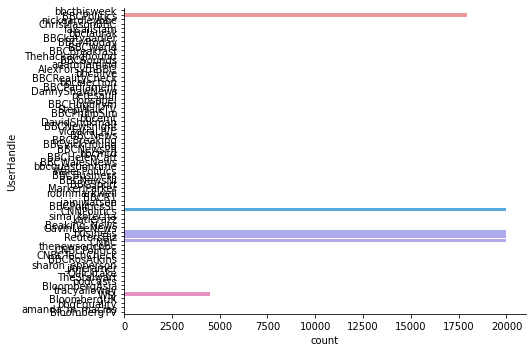

In [7]:
import seaborn as sns
plt = sns.catplot(y='UserHandle', kind='count', data=df_tweets, height=5, aspect=1.5)

## Tweet Cleaning

In [8]:
def sentence_to_wordlist(sentence, remove_stopwords=False):
    # 0. remove mentions(@), Hashtag(#)
    sentence = re.sub(r'@[^\s]+', '', sentence,flags=re.MULTILINE )
    sentence = re.sub(r'#[^\s]+', '', sentence,flags=re.MULTILINE )
    sentence = re.sub(r'RT[^\s]+', '', sentence,flags=re.MULTILINE )
    # 1. drop http
    p1=re.compile(r'http?:\/\/\S+', flags=re.DOTALL)
    sentence = re.sub(p1, '', sentence)
    # 2. drop https
    p1=re.compile(r'https?:\/\/\S+', flags=re.DOTALL)
    sentence = re.sub(p1, '', sentence)
    # 3. Remove non-letters
    sentence = re.sub(r'[^\w\s]','', sentence)
    # 4. Remove all numbers
    sentence = re.sub(r'[0-9]+', '', sentence)
    # 5. Convert words to lower case and split them
    sentence = sentence.lower().split()
    # Remove Stop Words
    # sentence = [word for word in sentence if not word in stop_words]
    # 5. Stemming
    # sentence = [stemmer.stem(w) for w in sentence] 
    # 6. Lemmatizing
    sentence = [lemmatizer.lemmatize(word) for word in sentence]

    #check if returned sentence is blank
    if len(sentence)==0:
      return np.nan
    else:
      # 7. Return a sentence of words
      sentence_r = ''
      for word in sentence:
        sentence_r = sentence_r + ' ' + word
      return(sentence_r)

In [9]:
# create a new column 
df_tweets['Content1']= df_tweets.Content.apply(lambda row: sentence_to_wordlist(row))
df_tweets.dropna(how='any', inplace=True)
df_tweets.reset_index( drop=True, inplace=True,)
df_tweets.head()

,tweet_date,Content,RetweetNum,LikeNum,UserHandle,Content1
0,2018-10-18 18:42:55+00:00,"""Nighty night don’t let the Skibidi dance challenge bite"" @afneil closing #bbctw (and he had not had a drink at that point!) https://t.co/Sgu2mGp0z3",132,432,bbcthisweek,nighty night dont let the skibidi dance challenge bite closing and he had not had a drink at that point
1,2019-05-16 11:15:00+00:00,"""For me to raise the money... the only way is to sell the house""\n\nThousands of freelancers are facing huge tax bills dating back up to 20 years, after the government closed a loophole called the #LoanCharge\n\n[tap to expand] https://t.co/i0rIDxloXB #politicslive https://t.co/CVW1ScXuAE",123,191,BBCPolitics,for me to raise the money the only way is to sell the house thousand of freelancer are facing huge tax bill dating back up to year after the government closed a loophole called the tap to expand
2,2019-06-29 20:50:39+00:00,Brexit: Jeremy Hunt 'could withhold part of £39bn divorce bill' https://t.co/LpeauGKfSx,18,41,BBCPolitics,brexit jeremy hunt could withhold part of bn divorce bill
3,2019-06-30 04:48:36+00:00,Len McCluskey: “I’m comfortable” for any #Brexit deal to be put to a public vote \n\nThe General Secretary of the Unite Union says: “The problem is how you get there”\n\n#Marr https://t.co/BVuXhwDFkC https://t.co/VnoHGMbaFa,42,83,BBCPolitics,len mccluskey im comfortable for any deal to be put to a public vote the general secretary of the unite union say the problem is how you get there
4,2019-06-30 05:00:08+00:00,“The commitment I would not drop is the one to reduce corporation tax” in the event of a no deal #Brexit says Conservative leadership candidate Jeremy Hunt\n\n#Marr https://t.co/B9aInqak0v https://t.co/yGTnGFpWgf,6,39,BBCPolitics,the commitment i would not drop is the one to reduce corporation tax in the event of a no deal say conservative leadership candidate jeremy hunt


In [10]:
# Get US holidays
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holidays = cal.holidays(start='2021-06-01', end='2022-12-31').to_pydatetime()
holiday_date = []
for days in holidays:
    holiday_date.append(days.date())

#check weekend or US holiday
def IsHoliday(x,holiday_date):
    # date = x.date()
    weekday = x.weekday()
    if (x in holiday_date) | (weekday==5) | (weekday==6):
        return True #it is holiday
    else:
        return False #it is not holiday

#during market or after market
def IsAfterMkt(x):
    x = x.time()
    starttime = datetime.strptime('9:30:00','%H:%M:%S').time()
    endtime = datetime.strptime('16:00:00','%H:%M:%S').time()
    if ((x >= starttime) & (x<=endtime)):
         return False
    else:
        return True

# Same day or next day
def IsSameDay(x):
    x = x.time()
    samedaystarttime = datetime.strptime('00:00:00','%H:%M:%S').time()
    samedayndtime = datetime.strptime('16:00:00','%H:%M:%S').time()
    if ((x >= samedaystarttime) & (x <= samedayndtime)):
        return True
    else:
        return False


# transform date to correspond to stock market open or close   
def edit_date(x):
    # x = x-timedelta(hours=5)
    date = x.date()
    time = x.time()

    if (IsAfterMkt(x)==True) & (IsSameDay(x)==False):
        time=datetime.strptime('9:30:00','%H:%M:%S').time()
        date=date+timedelta(days=1)
    elif ((IsAfterMkt(x)==True) & (IsSameDay(x)==True)):
        date=date
        time=time=datetime.strptime('9:30:00','%H:%M:%S').time()
    
    while IsHoliday(date,holiday_date) ==1:
        date = date+timedelta(days=1)

    date_time = str(date)+ ' '+ str(time)
    date_time = datetime.strptime(date_time, "%Y-%m-%d %H:%M:%S")
    return date_time

# Code for checking logic
#colofinterest=['tweet_date','tweet_day','Date','Day']
#df_tweets[colofinterest].iloc[85:300]

In [11]:
# Change tweet date to corresponding market open date and time
df_tweets['tweet_day'] = df_tweets.tweet_date.apply(lambda row:row.date().strftime("%A"))
df_tweets['Date'] = df_tweets.tweet_date.apply(lambda row:edit_date(row))
df_tweets['Day'] = df_tweets.Date.apply(lambda row:row.date().strftime("%A"))
df_tweets['Date'] = df_tweets.Date.dt.round('15min') #round to the nearest 15 minute
df_tweets.head(5)

,tweet_date,Content,RetweetNum,LikeNum,UserHandle,Content1,tweet_day,Date,Day
0,2018-10-18 18:42:55+00:00,"""Nighty night don’t let the Skibidi dance challenge bite"" @afneil closing #bbctw (and he had not had a drink at that point!) https://t.co/Sgu2mGp0z3",132,432,bbcthisweek,nighty night dont let the skibidi dance challenge bite closing and he had not had a drink at that point,Thursday,2018-10-19 09:30:00,Friday
1,2019-05-16 11:15:00+00:00,"""For me to raise the money... the only way is to sell the house""\n\nThousands of freelancers are facing huge tax bills dating back up to 20 years, after the government closed a loophole called the #LoanCharge\n\n[tap to expand] https://t.co/i0rIDxloXB #politicslive https://t.co/CVW1ScXuAE",123,191,BBCPolitics,for me to raise the money the only way is to sell the house thousand of freelancer are facing huge tax bill dating back up to year after the government closed a loophole called the tap to expand,Thursday,2019-05-16 11:15:00,Thursday
2,2019-06-29 20:50:39+00:00,Brexit: Jeremy Hunt 'could withhold part of £39bn divorce bill' https://t.co/LpeauGKfSx,18,41,BBCPolitics,brexit jeremy hunt could withhold part of bn divorce bill,Saturday,2019-07-01 09:30:00,Monday
3,2019-06-30 04:48:36+00:00,Len McCluskey: “I’m comfortable” for any #Brexit deal to be put to a public vote \n\nThe General Secretary of the Unite Union says: “The problem is how you get there”\n\n#Marr https://t.co/BVuXhwDFkC https://t.co/VnoHGMbaFa,42,83,BBCPolitics,len mccluskey im comfortable for any deal to be put to a public vote the general secretary of the unite union say the problem is how you get there,Sunday,2019-07-01 09:30:00,Monday
4,2019-06-30 05:00:08+00:00,“The commitment I would not drop is the one to reduce corporation tax” in the event of a no deal #Brexit says Conservative leadership candidate Jeremy Hunt\n\n#Marr https://t.co/B9aInqak0v https://t.co/yGTnGFpWgf,6,39,BBCPolitics,the commitment i would not drop is the one to reduce corporation tax in the event of a no deal say conservative leadership candidate jeremy hunt,Sunday,2019-07-01 09:30:00,Monday


In [12]:
# create a new column 
import swifter
df_tweets['Content1']= df_tweets.Content.apply(lambda row: sentence_to_wordlist(row))
df_tweets.dropna(how='any', inplace=True)
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102654 entries, 0 to 102653
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype              
---  ------      --------------   -----              
 0   tweet_date  102654 non-null  datetime64[ns, UTC]
 1   Content     102654 non-null  object             
 2   RetweetNum  102654 non-null  int64              
 3   LikeNum     102654 non-null  int64              
 4   UserHandle  102654 non-null  object             
 5   Content1    102654 non-null  object             
 6   tweet_day   102654 non-null  object             
 7   Date        102654 non-null  datetime64[ns]     
 8   Day         102654 non-null  object             
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), int64(2), object(5)
memory usage: 7.0+ MB


# Tweet Sentiments

In [13]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon', quiet=True)

def polarityScore(a, col):
    # Create a column for score
    a['score'] = a[col].swifter.apply(lambda row: calculate_polarity_scores(row))
    #split all the scores into separate columns
    # columns = ['negative', 'neutral', 'positive', 'compound'])
    a['negative']=a.score.apply(lambda x: x[0])
    a['neutral']=a.score.apply(lambda x: x[1])
    a['positive']=a.score.apply(lambda x: x[2])
    a['combined']=a.score.apply(lambda x: x[3])
    return a

def calculate_polarity_scores(x):
    sid = SentimentIntensityAnalyzer()
    score = sid.polarity_scores(x)
    score_list = []
    for i in score.values():
        score_list.append(i)
    return score_list

In [14]:
df_tweets = polarityScore(df_tweets, 'Content1')
# sns.histplot(data=result, x='compound')
df_tweets.head()

Pandas Apply: 100%|██████████| 102654/102654 [12:22<00:00, 138.20it/s]


,tweet_date,Content,RetweetNum,LikeNum,UserHandle,Content1,tweet_day,Date,Day,score,negative,neutral,positive,combined
0,2018-10-18 18:42:55+00:00,"""Nighty night don’t let the Skibidi dance challenge bite"" @afneil closing #bbctw (and he had not had a drink at that point!) https://t.co/Sgu2mGp0z3",132,432,bbcthisweek,nighty night dont let the skibidi dance challenge bite closing and he had not had a drink at that point,Thursday,2018-10-19 09:30:00,Friday,"[0.0, 0.933, 0.067, 0.0772]",0.000,0.933,0.067,0.0772
1,2019-05-16 11:15:00+00:00,"""For me to raise the money... the only way is to sell the house""\n\nThousands of freelancers are facing huge tax bills dating back up to 20 years, after the government closed a loophole called the #LoanCharge\n\n[tap to expand] https://t.co/i0rIDxloXB #politicslive https://t.co/CVW1ScXuAE",123,191,BBCPolitics,for me to raise the money the only way is to sell the house thousand of freelancer are facing huge tax bill dating back up to year after the government closed a loophole called the tap to expand,Thursday,2019-05-16 11:15:00,Thursday,"[0.0, 0.835, 0.165, 0.6908]",0.000,0.835,0.165,0.6908
2,2019-06-29 20:50:39+00:00,Brexit: Jeremy Hunt 'could withhold part of £39bn divorce bill' https://t.co/LpeauGKfSx,18,41,BBCPolitics,brexit jeremy hunt could withhold part of bn divorce bill,Saturday,2019-07-01 09:30:00,Monday,"[0.0, 1.0, 0.0, 0.0]",0.000,1.000,0.000,0.0000
3,2019-06-30 04:48:36+00:00,Len McCluskey: “I’m comfortable” for any #Brexit deal to be put to a public vote \n\nThe General Secretary of the Unite Union says: “The problem is how you get there”\n\n#Marr https://t.co/BVuXhwDFkC https://t.co/VnoHGMbaFa,42,83,BBCPolitics,len mccluskey im comfortable for any deal to be put to a public vote the general secretary of the unite union say the problem is how you get there,Sunday,2019-07-01 09:30:00,Monday,"[0.084, 0.812, 0.103, 0.1531]",0.084,0.812,0.103,0.1531
4,2019-06-30 05:00:08+00:00,“The commitment I would not drop is the one to reduce corporation tax” in the event of a no deal #Brexit says Conservative leadership candidate Jeremy Hunt\n\n#Marr https://t.co/B9aInqak0v https://t.co/yGTnGFpWgf,6,39,BBCPolitics,the commitment i would not drop is the one to reduce corporation tax in the event of a no deal say conservative leadership candidate jeremy hunt,Sunday,2019-07-01 09:30:00,Monday,"[0.08, 0.76, 0.16, 0.2991]",0.080,0.760,0.160,0.2991


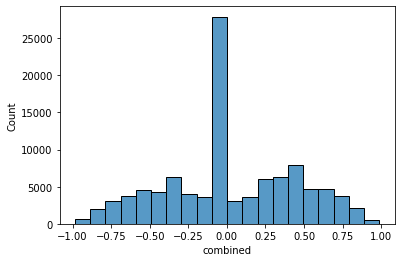

In [15]:
import seaborn as sns
plt = sns.histplot(data=df_tweets, x='combined',bins=20)

# Merge

In [16]:
df = pd.merge(df_date,df_stocks_open,how='inner', on='Date')
df = pd.merge(df, df_tweets, how='inner', on='Date')
#df = df.dropna().reset_index(drop=True)
df

,Date,BTC-USDOpen,CL=FOpen,TSLAOpen,GSPCOpen,GSPTSEOpen,IXICOpen,BTC-USDDelta,BTC-USDDirection,CL=FDelta,CL=FDirection,TSLADelta,TSLADirection,GSPCDelta,GSPCDirection,GSPTSEDelta,GSPTSEDirection,IXICDelta,IXICDirection,tweet_date,Content,RetweetNum,LikeNum,UserHandle,Content1,tweet_day,Day,score,negative,neutral,positive,combined
0,2022-01-26 09:30:00,38421.363281,86.430000,952.429993,4408.430176,20781.300781,13868.869141,0.158282,1.0,-0.103958,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-01-25 16:00:26+00:00,"The numbers are in, and the world still loves Adele—even at her worst https://t.co/RIl3yyFA4V https://t.co/mbI3YbCZrI",91,566,business,the number are in and the world still love adeleeven at her worst,Tuesday,Wednesday,"[0.209, 0.51, 0.281, 0.1027]",0.209,0.510,0.281,0.1027
1,2022-01-26 09:30:00,38421.363281,86.430000,952.429993,4408.430176,20781.300781,13868.869141,0.158282,1.0,-0.103958,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-01-25 16:00:28+00:00,"Yes, ""30"" is Adele's worst-selling record and yet the best-selling album of 2021. \n\nIn fact, Adele was the only artist to exceed 1 million copies last year. Despite its mid-November debut, “30” sold twice as many copies as any other released in 2021 https://t.co/RIl3yyFA4V https://t.co/eVT05I8Uhd",348,1889,business,yes is adeles worstselling record and yet the bestselling album of in fact adele wa the only artist to exceed million copy last year despite it midnovember debut sold twice a many copy a any other released in,Tuesday,Wednesday,"[0.0, 0.928, 0.072, 0.4019]",0.000,0.928,0.072,0.4019
2,2022-01-26 09:30:00,38421.363281,86.430000,952.429993,4408.430176,20781.300781,13868.869141,0.158282,1.0,-0.103958,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-01-25 16:00:29+00:00,There is an explanation: the collapse of album sales industrywide over the last decade. \n\nThere's also an obvious culprit: streaming https://t.co/RIl3yyFA4V,54,378,business,there is an explanation the collapse of album sale industrywide over the last decade there also an obvious culprit streaming,Tuesday,Wednesday,"[0.144, 0.856, 0.0, -0.4939]",0.144,0.856,0.000,-0.4939
3,2022-01-26 09:30:00,38421.363281,86.430000,952.429993,4408.430176,20781.300781,13868.869141,0.158282,1.0,-0.103958,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-01-25 16:00:29+00:00,"Streaming has created an era of abundance. With abundance comes fragmentation.\n\nNow, as the music industry gets bigger, the hits get smaller.\n\nView the Bloomberg Pop Star Power Rankings here ⬇️ https://t.co/RIl3yyFA4V",32,153,business,streaming ha created an era of abundance with abundance come fragmentation now a the music industry get bigger the hit get smaller view the bloomberg pop star power ranking here,Tuesday,Wednesday,"[0.0, 0.86, 0.14, 0.5267]",0.000,0.860,0.140,0.5267
4,2022-01-26 09:30:00,38421.363281,86.430000,952.429993,4408.430176,20781.300781,13868.869141,0.158282,1.0,-0.103958,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-01-25 16:00:51+00:00,Bank of America to award special bonuses to employees for 2021 - memo https://t.co/uyNOes8poH https://t.co/E7U688wZtm,7,26,ReutersBiz,bank of america to award special bonus to employee for memo,Tuesday,Wednesday,"[0.0, 0.452, 0.548, 0.8658]",0.000,0.452,0.548,0.8658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39619,2022-03-25 15:45:00,44493.480469,112.629997,NaN,NaN,NaN,NaN,0.071224,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-25 15:45:11+00:00,"Now that Americans can protect themselves with COVID vaccines, insurance companies are requiring patients to bear more costs for COVID care, and many 'don't have enough money to pay,' said Krutika Amin, associate director at the Kaiser Family Foundation https://t.co/Uggwr2K5pr https://t.co/8jQp6Ero2y",2,8,ReutersBiz,now that american can protect themselves with covid vaccine insurance company are requiring patient to bear more cost for covid care and many dont have enough money t

# EDA

<AxesSubplot:xlabel='CL=FDirection', ylabel='Count'>

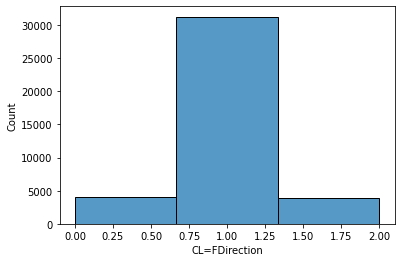

In [17]:
sns.histplot(data=df, x='CL=FDirection',bins=3)

In [18]:
df.groupby(['CL=FDirection'], as_index=False).agg(
    {
        'combined':['count','mean','var'],
        'negative':['count','mean','var'],
        'neutral':['count','mean','var'],
        'positive':['count','mean','var'],
    }
)

CL=FDirection combined                     negative                      \
                   count      mean       var    count      mean       var   
0           0.0     4025  0.020850  0.175022     4025  0.080296  0.011156   
1           1.0    31275  0.034729  0.179526    31275  0.078400  0.011035   
2           2.0     3936 -0.023435  0.178113     3936  0.089255  0.012048   

  neutral                     positive                      
    count      mean       var    count      mean       var  
0    4025  0.829480  0.018127     4025  0.090226  0.010698  
1   31275  0.828104  0.018133    31275  0.093497  0.011295  
2    3936  0.824971  0.018222     3936  0.085778  0.010049

<AxesSubplot:xlabel='GSPCDirection', ylabel='Count'>

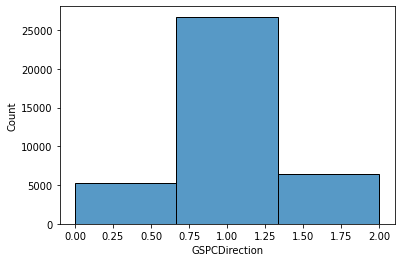

In [19]:
sns.histplot(data=df, x='GSPCDirection',bins=3)

In [20]:
df.groupby(['GSPCDirection'], as_index=False).agg(
    {
        'combined':['count','mean','var'],
        'negative':['count','mean','var'],
        'neutral':['count','mean','var'],
        'positive':['count','mean','var'],
    }
)

GSPCDirection combined                     negative                      \
                   count      mean       var    count      mean       var   
0           0.0     5296  0.030094  0.177357     5296  0.080270  0.011029   
1           1.0    26737  0.026273  0.179945    26737  0.079755  0.011145   
2           2.0     6405  0.023701  0.179237     6405  0.080398  0.011591   

  neutral                     positive                      
    count      mean       var    count      mean       var  
0    5296  0.824624  0.019003     5296  0.095108  0.012097  
1   26737  0.828581  0.017923    26737  0.091666  0.010967  
2    6405  0.827595  0.018428     6405  0.092002  0.010911

<AxesSubplot:xlabel='GSPTSEDirection', ylabel='Count'>

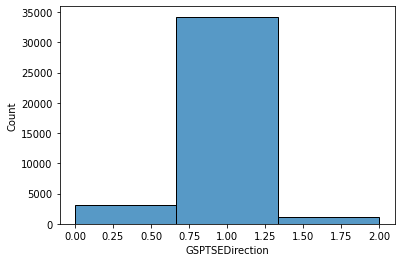

In [21]:
sns.histplot(data=df, x='GSPTSEDirection',bins=3)

In [22]:
df.groupby(['GSPTSEDirection'], as_index=False).agg(
    {
        'combined':['count','mean','var'],
        'negative':['count','mean','var'],
        'neutral':['count','mean','var'],
        'positive':['count','mean','var'],
    }
)

GSPTSEDirection combined                     negative                      \
                     count      mean       var    count      mean       var   
0             0.0     3031  0.031731  0.179665     3031  0.080342  0.011539   
1             1.0    34239  0.023769  0.179357    34239  0.080168  0.011201   
2             2.0     1168  0.088730  0.178223     1168  0.071971  0.010358   

  neutral                     positive                      
    count      mean       var    count      mean       var  
0    3031  0.825124  0.019625     3031  0.094535  0.012347  
1   34239  0.828268  0.018038    34239  0.091564  0.010968  
2    1168  0.823359  0.017820     1168  0.104658  0.012028

<AxesSubplot:xlabel='IXICDirection', ylabel='Count'>

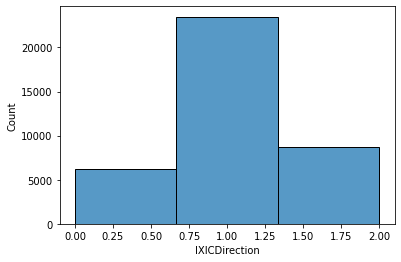

In [23]:
sns.histplot(data=df, x='IXICDirection',bins=3)

In [24]:
df.groupby(['IXICDirection'], as_index=False).agg(
    {
        'combined':['count','mean','var'],
        'negative':['count','mean','var'],
        'neutral':['count','mean','var'],
        'positive':['count','mean','var'],
    }
)

IXICDirection combined                     negative                      \
                   count      mean       var    count      mean       var   
0           0.0     6244  0.022956  0.178879     6244  0.081878  0.011291   
1           1.0    23484  0.029305  0.179645    23484  0.079054  0.011034   
2           2.0     8710  0.020907  0.179373     8710  0.080910  0.011592   

  neutral                     positive                      
    count      mean       var    count      mean       var  
0    6244  0.824465  0.018939     6244  0.093659  0.011786  
1   23484  0.828915  0.017885    23484  0.092032  0.011031  
2    8710  0.827498  0.018324     8710  0.091590  0.010856

# Last Step - Export Data

In [25]:
df.columns

Index(['Date', 'BTC-USDOpen', 'CL=FOpen', 'TSLAOpen', 'GSPCOpen', 'GSPTSEOpen',
       'IXICOpen', 'BTC-USDDelta', 'BTC-USDDirection', 'CL=FDelta',
       'CL=FDirection', 'TSLADelta', 'TSLADirection', 'GSPCDelta',
       'GSPCDirection', 'GSPTSEDelta', 'GSPTSEDirection', 'IXICDelta',
       'IXICDirection', 'tweet_date', 'Content', 'RetweetNum', 'LikeNum',
       'UserHandle', 'Content1', 'tweet_day', 'Day', 'score', 'negative',
       'neutral', 'positive', 'combined'],
      dtype='object')

In [26]:
df.groupby(['Date'], as_index=False).agg(
    {
        'combined':['count','mean','var'],
        'negative':['count','mean','var'],
        'neutral':['count','mean','var'],
        'positive':['count','mean','var'],
        'CL=FDirection':['mean'],
        'GSPCDirection':['mean'],
        'GSPTSEDirection':['mean'],
        'IXICDirection':['mean'],
        'BTC-USDDirection':['mean'],
        'TSLADirection':['mean'],
    }
).reset_index(drop=True).to_csv('data/news_tweets_sentiments.csv',index=False, header=True)

In [27]:
df.groupby(['Date'])[['combined','negative','neutral','positive','CL=FDirection','GSPCDirection','GSPTSEDirection','IXICDirection']]\
    .mean().reset_index(drop=True)

    # .to_csv('data/finaldata.csv',index=False, header=True)

,combined,negative,neutral,positive,CL=FDirection,GSPCDirection,GSPTSEDirection,IXICDirection
0,0.068707,0.064962,0.836505,0.098543,1.0,NaN,NaN,NaN
1,0.167814,0.032143,0.841714,0.126143,1.0,1.0,1.0,0.0
2,-0.061985,0.094750,0.838250,0.067000,2.0,2.0,1.0,2.0
3,0.318450,0.060500,0.754700,0.184900,1.0,1.0,1.0,1.0
4,0.033783,0.089500,0.775167,0.135333,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...
1128,0.117475,0.128875,0.684625,0.186500,1.0,NaN,NaN,NaN
1129,-0.210880,0.067800,0.917200,0.015000,1.0,NaN,NaN,NaN
1130,-0.065575,0.076667,0.858333,0.065000,1.0,NaN,NaN,NaN
1131,0.134460,0.055100,0.844500,0.100300,NaN,NaN,NaN,NaN


In [28]:
#df.groupby(['Date'])[['combined','negative','neutral','positive','inc/dec']].mean().reset_index(drop=True)

In [29]:
#df[['Date','Content','Content1','combined','negative','neutral','positive','inc/dec']].to_csv('data/results.csv',index=False, sep=',')